In [283]:
import matplotlib.pyplot as plt
import pandas as pd
import hypernetx as hnx

In [284]:
# Specify the query name to be visualized from the options below
queryname = "3CC-S"

In [285]:
# 3perm-AS
if queryname ==  "3perm-AS":
    query =  [("A",['x']),("S",['x','y']),("R",['x','y']), ("R",['y','z']), ("R",['z','y'])]
    clingo_output_witnesses_str = "witness(5,3,4) witness(2,4,3) witness(4,4,5) witness(5,5,4) witness(1,5,6) witness(4,6,5)"
    clingo_variable_order_str = "X, Z, Y"
    endpoints = ['A(1)', 'A(2)']

In [286]:
# #3perm-SC
if queryname ==  "3perm-SC":
    query =  [("S",['x','y']),("R",['x','y']),("R",['y','z']), ("R",['z','y']),("C",['z']),]
    clingo_output_witnesses_str = "witness(1,4,1) witness(2,3,4) witness(3,4,1)"
    clingo_variable_order_str = "Z, Y, X"
    endpoints = ['C(1)', 'C(2)']

In [287]:
# 3perm-SB
if queryname ==  "3perm-SB":
    query = [("S",['x','y']),("R",['x','y']),("B",['y']), ("R",['y','z']), ("R",['z','y'])]
    clingo_output_witnesses_str = "witness(5,2,6) witness(6,4,5) witness(2,5,1) witness(6,5,5) witness(4,6,3) witness(5,6,6)"
    clingo_variable_order_str = "Y, Z, X"
    endpoints = ['B(2)', 'R(1,2)', 'S(1,2)', 'B(4)', 'R(3,4)', 'S(3,4)']


In [288]:
# 3CC-S
if queryname ==  "3CC-S":
    query = [("R",['x','y']), ("R",['y','z']), ("R",['w','z']),("S",['w','z'])]
    clingo_output_witnesses_str = "witness(1,5,2,6) witness(3,1,4,5) witness(5,1,6,5)"
    clingo_variable_order_str  = "W, X, Z, Y"
    endpoints = ['R(1,2)', 'R(3,4)']

In [289]:
# # z6
if queryname ==  "z6":
    print('yes')
    query = [("A",['x']),("R",['x','y']),("R",['y','y']), ("R",['y','z']),("C",['z'])]
    clingo_output_witnesses_str = "witness(4,7,4) witness(4,1,6) witness(4,5,7) witness(4,7,7) witness(5,7,4) witness(8,2,3) witness(8,7,3)"
    clingo_variable_order_str  = "Z, X, Y"
    endpoints = ['A(1)', 'A(2)']


In [290]:
clingo_output_witnesses = [[int(x) for x in c[len('witness')+1:-1].split(',')] for c in clingo_output_witnesses_str.split()]
clingo_output_witnesses_df = pd.DataFrame(clingo_output_witnesses, columns=clingo_variable_order_str.split(', '))

witness_edges = []
for w in clingo_output_witnesses_df.iterrows():
    witness_edge = []
    for table, table_var in query:
        tuple_node = table + '('
        for tv in table_var:
            tuple_node += str(w[1].loc[tv.upper()])+','
        tuple_node = tuple_node[:-1]
        tuple_node += ')'
        witness_edge.append(tuple_node)
    witness_edges.append(witness_edge)
print(witness_edges)

[['R(5,6)', 'R(6,2)', 'R(1,2)', 'S(1,2)'], ['R(1,5)', 'R(5,4)', 'R(3,4)', 'S(3,4)'], ['R(1,5)', 'R(5,6)', 'R(5,6)', 'S(5,6)']]


In [291]:
# Convert the edges into the hypergraph
witness_hypergraph = {i: tuple(witness_edges[i]) for i in range(len(witness_edges))}
H = hnx.Hypergraph(witness_hypergraph)

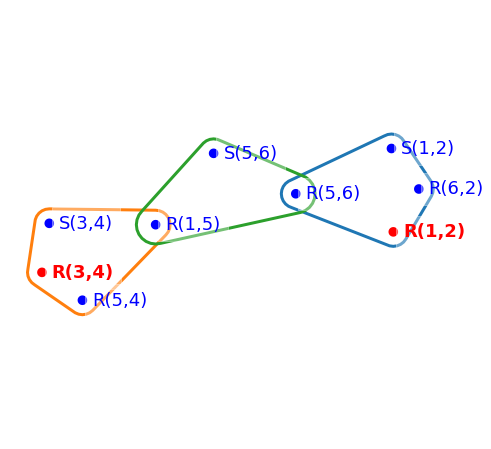

In [292]:
# Draw the hypergraph! 
node_colors = ['red' if n.uid in endpoints else 'blue' for n in H.nodes()]
hnx.draw(H, with_edge_labels = False, nodes_kwargs={
                     'facecolors': node_colors,
                 }, node_labels_kwargs={
                     'fontsize':18,
                     'color':{v: 'red' if v in endpoints else 'blue' for v in H},
                     'weight': {v: 'bold' if v in endpoints else 'ultralight' for v in H}
                 }, edges_kwargs={
                     'linewidths':3
                 })
plt.savefig('ijp_visualizations/'+queryname+'.pdf')